In [109]:
# Загружаем библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random
import seaborn as sns
import math

## <font color = green> Задание №1 </font>
Построение 95% доверительного интервала для выборки

In [89]:
# Импортируем файл с данными
task_1 = pd.read_excel('file_1.xlsx')
print('Всего наблюдений:', len(task_1))

task_1.head(3)

Всего наблюдений: 200


,№,Value
0,0,10.405433
1,1,6.847904
2,2,10.171496


In [90]:
#Найдем по выборке среднее значение и стандартное отклонение
m = np.mean(task_1['Value'])
s = np.std(task_1['Value'])
print('Среднее по выборке равно: ', m)
print('Стандартное отклонение равно:', s)

Среднее по выборке равно:  14.4056783306397
Стандартное отклонение равно: 5.207907315704131


In [91]:
# Проверим, принадлежит ли выборка популяции с нормальным распределением со средним 15 и дисперсией 4
# Рассчитаем 95% ДИ
lower = np.percentile(task_1['Value'], 2.5)
upper = np.percentile(task_1['Value'], 97.5)
print("95% доверительный интервал среднего:", (round(lower, 2), round(upper, 2)))

95% доверительный интервал среднего: (3.99, 23.96)


In [92]:
#Проверим доверительный интервал с помощью библиотеки scipy
# Рассчитаем 95% ДИ, используя t-распределение
CI_1 = st.norm.interval(alpha=0.95, loc=m, scale=s)
print("95% доверительный интервал среднего (z-распределение):", CI_1)

95% доверительный интервал среднего (z-распределение): (4.198367557036935, 24.612989104242466)


Для маленьких выборок (20-100 объектов) z-распределение дает большую ошибку, поэтому лучше использовать t-распределение

In [98]:
#Выберем 30 объектов случайно из датафрейма:
np.random.seed(0)
sample_1 = task_1.sample(n = 20)

print('Количество наблюдений в подвыборке:', len(sample_1))

Количество наблюдений в подвыборке: 20


In [101]:
#z-распределение
CI_z = st.norm.interval(alpha=0.95, loc=np.mean(sample_1['Value']), scale=np.std(sample_1['Value']))
print("95% доверительный интервал среднего (z-распределение):", CI_z)

#t-распределение
CI_t = st.t.interval(alpha=0.95, df=len(sample_1['Value'])-1, loc=np.mean(sample_1['Value']), scale=np.std(sample_1['Value']))
print("95% доверительный интервал среднего (t-распределение):", CI_t)


95% доверительный интервал среднего (z-распределение): (7.3379253841529355, 22.344206793650756)
95% доверительный интервал среднего (t-распределение): (6.828544378032468, 22.853587799771223)


## <font color = green> Задание №2 </font>
Расчет p-value и тестирование гипотез

In [136]:
# Импортируем файл с данными
task_2 = pd.read_excel('file_2.xlsx')
print('Всего наблюдений:', len(task_2))

Всего наблюдений: 365


In [143]:
#Проверим гипотезу, что в среднем в день отправляли 200 (а не больше) сообщений в чате по 35 дням
#Уровень значимости равен 5%
M200 = 200
n = 35
a = 0.05

#Выберем 35 дней
np.random.seed(0)
sample_2 = task_2.sample(n = 35)

sample_2.head(3)

,№,Quantity
106,107,225
259,260,198
45,46,193


<AxesSubplot:ylabel='Count'>

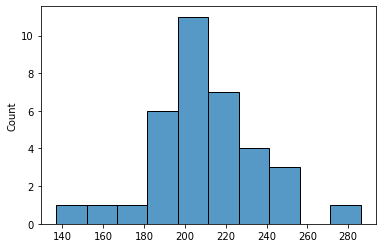

In [138]:
#Построим график
x = np.asarray(sample_2['Quantity'])
sns.histplot(x, bins=10)

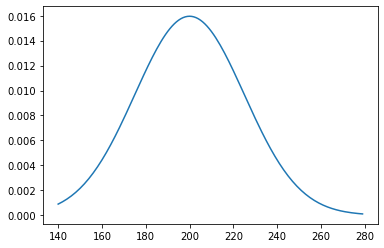

In [139]:
#Построим кривую нормального распределения со средним 200:
x = np.arange (140, 280, 1)
plt.plot(x, st.norm.pdf (x, 200, 25))

In [142]:
#Найдем среднее и стандартное отклонение
m2 = np.mean(task_2['Quantity'])
s2 = np.std(task_2['Quantity'])

#Найдем доверительные интервалы для t-распределения
t_2 = (m2-M200)/(s2/np.sqrt(n))
p_value2 = 1-st.t.cdf(t_2, df=n-1)
print('P-value по итогам тестирования гипотезы равно: ', p_value2)

P-value по итогам тестирования гипотезы равно:  0.043644844181608855


In [147]:
if p_value2 < a:
    print('P-value меньше выбранного увроня значимости. Следовательно, основную гипотезу отклоняем: среднее количество сообщений в день было больше 200.')
else:
    print('P-value больше выбранного увроня значимости. Следовательно, основную гипотезу не отклоняем: среднее количество сообщений в день было 200.')

P-value меньше выбранного увроня значимости. Следовательно, основную гипотезу отклоняем: среднее количество сообщений в день было больше 200.
